In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read in the dataset
file_path = Path("./Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head(2) 

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0


In [3]:
#Prepare data by dropping Myopic from the dataset
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1) 
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


# PCA 

In [4]:
scaler_pca = StandardScaler()
pca_scaled_features = scaler_pca.fit_transform(X)

In [5]:
# Initialize PCA model
pca = PCA(n_components=.90)
# Get principal components for the data.
myopia_pca = pca.fit_transform(pca_scaled_features)

In [6]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [7]:
sum(pca.explained_variance_ratio_)

0.9187361702915188

In [8]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2","principal component 3", 
                              "principal component 4", "principal component 5","principal component 5",
                             "principal component 7", "principal component 8","principal component 9",
                             "principal component 10"
                             ]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 5,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


* From PCA analysis, after applying a standard scalar, 92% of the information in the data is represented with 10 components. 4 dimensions were dropped.

# GridCV

In [9]:
# Establish Training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Steps in the ML chain, in order
steps = [
   ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lr', LogisticRegression())
    
]

In [11]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('lr', LogisticRegression())])

In [12]:
# Parameters for pipeline components 
params =  {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'lr__solver': ['sag', 'lbfgs'],
          'pca__n_components':[.90]}

In [13]:
# Run GridSearchCV
cv = GridSearchCV(pipe, params)
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'lr__solver': ['sag', 'lbfgs'],
                         'pca__n_components': [0.9]})

In [14]:
# Evaluate performance
cv.score(X_test, y_test)

0.896774193548387

In [15]:
# Best params
cv.best_params_

{'lr__C': 0.1, 'lr__solver': 'sag', 'pca__n_components': 0.9}

* Using GridSearchCV, the cv score using PCA n components = .90 is 90%.

# t - SNE

In [16]:
#scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_myopia_pca )

In [17]:
tsne = TSNE(learning_rate=200)

In [18]:
tsne_features = tsne.fit_transform(scaled_features)

C:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [19]:
tsne_features.shape

(618, 2)

In [20]:
# Prepare to plot the dataset
# The first column of transformed features
X['x'] = tsne_features[:,0]
# The second column of transformed features
X['y'] = tsne_features[:,1]
X["class"] = df["MYOPIC"]

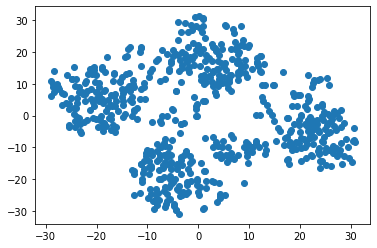

In [21]:
plt.scatter(X["x"], X["y"] )
plt.show()

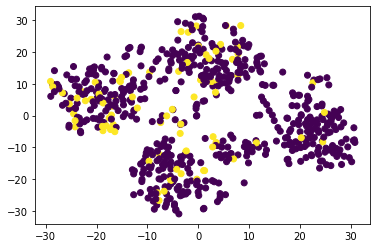

In [22]:
# Visualize the clusters with color
plt.scatter(X["x"], X["y"], c=X["class"] )
plt.show()

* After adjusting the learning rate, the t-SNE model does appear to be able to identify two overlapping clusters in the data.

# K Means

In [23]:
# Create K means model
model = KMeans(n_clusters=8, random_state=1)
model.fit(df)

KMeans(random_state=1)

In [24]:
# Get predictions
predictions = model.predict(df)
print(predictions)

[5 1 7 4 7 0 4 1 1 5 3 6 1 6 2 1 6 2 5 6 4 1 6 0 5 5 7 6 1 6 2 4 4 5 2 5 0
 2 6 6 7 1 0 5 5 1 0 6 6 4 1 1 1 1 7 4 5 6 1 6 4 6 4 1 3 4 1 6 5 1 0 1 3 4
 1 6 6 3 4 2 1 2 1 2 1 6 4 4 1 2 7 1 2 4 7 0 5 1 2 2 0 6 0 5 0 4 1 5 2 6 3
 7 6 6 1 6 5 1 2 5 2 2 1 6 3 0 6 1 1 1 6 6 4 6 6 1 1 6 6 4 6 6 1 1 1 5 5 4
 1 0 2 6 0 1 2 1 1 6 1 2 6 7 5 7 6 6 4 5 0 1 1 4 3 6 1 7 1 1 4 1 6 3 6 1 7
 0 1 1 7 2 6 2 6 7 6 4 7 5 1 4 1 6 6 5 5 7 4 6 1 4 3 2 2 5 2 2 0 6 6 4 1 5
 0 1 1 0 0 6 6 1 0 0 6 4 6 1 2 0 1 5 4 4 1 5 1 2 6 7 0 6 2 5 6 0 6 2 7 1 5
 6 5 1 6 7 1 1 5 1 1 1 6 1 4 4 7 1 5 1 0 5 6 3 2 0 2 1 6 0 2 5 1 1 4 1 3 6
 1 1 4 6 1 7 4 4 2 7 4 6 6 5 0 6 5 1 6 4 6 1 2 4 4 4 2 4 6 5 1 6 7 2 6 6 1
 6 1 6 7 1 4 2 2 5 6 2 7 6 7 4 0 2 6 7 6 6 1 2 6 1 4 5 1 1 2 6 6 1 2 4 6 5
 5 5 7 6 0 5 5 4 6 6 3 1 6 7 2 4 1 4 5 4 6 3 7 7 6 5 6 5 1 6 6 1 0 0 4 4 0
 3 4 4 6 5 6 4 6 5 1 7 1 6 4 5 1 7 3 2 1 0 5 2 3 6 1 6 1 2 2 3 6 3 6 7 5 4
 2 7 7 6 7 4 0 4 4 6 6 2 5 6 4 5 4 7 6 7 3 5 1 0 6 4 6 0 1 1 3 7 1 7 1 6 6
 7 2 3 1 6 6 4 1 3 0 7 1 

In [25]:
#df_myopia_pca =df_myopia_pca.drop("class", axis=1) 

In [26]:
# Add a new class column to df_iris
df["class"] = model.labels_
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,5
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,7
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,4
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,7


C:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


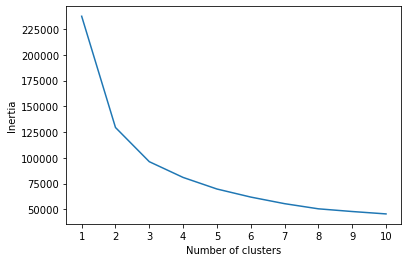

In [27]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
   
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

* From the chart, the recommendation would be there are 8 klusters or groups that the patients can be put in. I have come to this detrmination based on observing the K-Means chart and establishong that the curve starts to flatten at 7. This means there is not much more value in having more than 8 klusters.  

In [28]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [33]:
clusters = get_clusters(8, df)

In [37]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC', 'class'],
      dtype='object')

In [38]:
def show_clusters(df):
    plt.scatter(df['SPORTHR'], df['ACD'], c=df['class'])
    plt.xlabel('SPORTHR')
    plt.ylabel('ACD')
    plt.show()

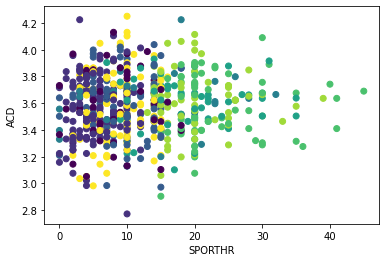

In [39]:
show_clusters(clusters)

* Simialr to the t-SNE chart, the clusters aren't clearly separated but using SPORTHR and ACD, you can observe the different groups in the data set.